## Task 1: Users to Movies


The following example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

<img src="img.png" height="300" width="300" align='center'>

- Here, each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?


In [6]:
# Import necessary libs:

# 1. import plt from matplotlib
# 2. import Axes3D from mpl_toolkits.mplot3d
# 3. import proj3d from mpl_toolkits.mplot3d
# 4. import FancyArrowPatch from matplotlib.patches
import numpy
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch 
import pandas
from sklearn.datasets import fetch_lfw_people 
from sklearn.decomposition import PCA

In [7]:
# Create the dataset using the np.array() with the data provided above
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])
# Store the number of users for further usages.
# Store the number of movies for further usages.
n_users=X.shape[0] 
n_movies=X.shape[1]
print(n_users)
print(n_movies)

7
5


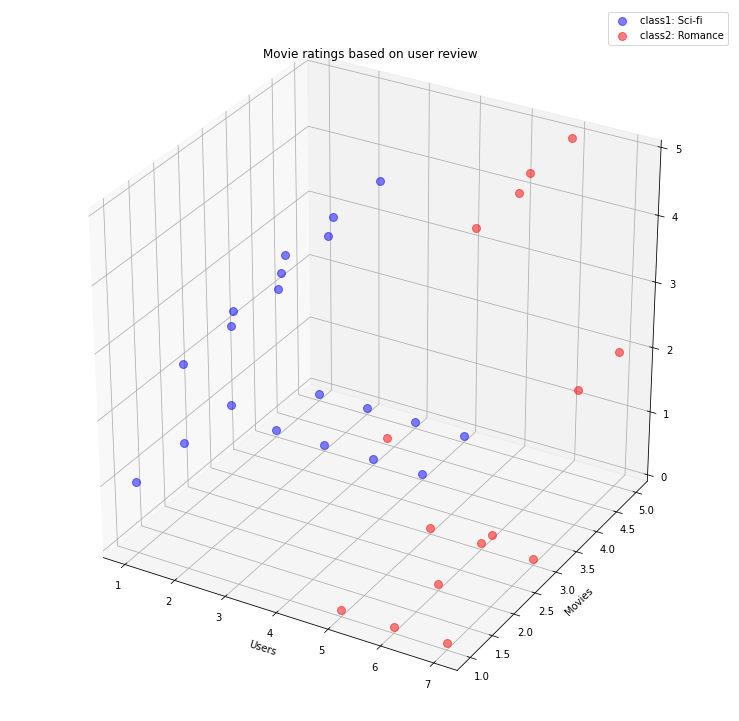

In [9]:
# Plot the data set:


# users= np.array(users)
# movies=[1,2,3,4,5]

# 1. Create three arrays: users, movie, and reviews. to represent the data matrix
#     that is users[0], movie[0] and reviews[0] represent the review of the first user on the first movie.

users=np.array( [[i]*n_movies for i in range(1, n_users+1) ]).flatten()
movie = np.array( [[i] for i in range(1, n_movies+1)]*n_users ).flatten()
reviews=X.flatten()
# tips: use np.array() and flatten() function.

# 2. Set the figure size to (13,13) by using the function plt.figure().
fig=plt.figure(figsize=(13,13))

# 3. Add the subplot that point the 1*1 grid by using the function add_subplot() on the figure object.
#     set the first positional arguments to 111 and projection to 3d.
ax=fig.add_subplot(111,projection='3d')    



# 5. Plot the dataset using plot() for the Sci-fi movie and set x to be the user list, y to be the movie list and z to be the reviews
#     moreover, set resonalbe color and label legend.
ax.plot(users[:20], movie[:20], reviews[:20], 'o', markersize=8, color='blue',  alpha=0.5, label='class1: Sci-fi')
ax.plot(users[20:], movie[20:], reviews[20:], 'o', markersize=8, color='red',   alpha=0.5, label='class2: Romance')

legend = ax.legend();
plt.title("Movie ratings based on user review")
plt.xlabel('Users')
plt.ylabel('Movies')

plt.show()





In [10]:
# Data Preprocessing:

# 1. Calculate the mean of the data set
m=X.mean(axis=0) #subtract the mean with axis 0 along the "rows"
# 2. Subtract the mean from the data set
X_=X-m
print(X_)
# 3. Store the new centered data set

[[-0.85714286 -1.28571429 -0.85714286 -1.57142857 -1.57142857]
 [ 1.14285714  0.71428571  1.14285714 -1.57142857 -1.57142857]
 [ 2.14285714  1.71428571  2.14285714 -1.57142857 -1.57142857]
 [ 3.14285714  2.71428571  3.14285714 -1.57142857 -1.57142857]
 [-1.85714286 -0.28571429 -1.85714286  2.42857143  2.42857143]
 [-1.85714286 -2.28571429 -1.85714286  3.42857143  3.42857143]
 [-1.85714286 -1.28571429 -1.85714286  0.42857143  0.42857143]]


## Solution1: Implementing PCA using Singular Value Decomposition (SVD)

We start with the simplest and most straightforward strategy first - **Singular Value Decomposition**. <br>

From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting $v_1, v_2, ..., v_k$ vectors.


In [11]:
# Calculate the U, S, V^T:
# 1. Use the singular value decomposition from numpy.
# 2. np.linalg.svd()
# 3. Store the u,s,v^T values
u, s, vT = np.linalg.svd(X_)


In [12]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")

print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[ 0.014 -0.691  0.158  0.343 -0.51   0.059 -0.341]
 [ 0.265 -0.142  0.077 -0.059 -0.184 -0.839  0.403]
 [ 0.39   0.133  0.036 -0.596 -0.595  0.329  0.11 ]
 [ 0.516  0.408 -0.004  0.702 -0.158  0.155  0.16 ]
 [-0.388  0.286 -0.686  0.091 -0.47  -0.211 -0.154]
 [-0.546  0.347  0.662  0.099 -0.325 -0.028  0.162]
 [-0.25  -0.34  -0.244  0.115 -0.036  0.339  0.796]]

S =
[10.492  4.09   1.324  0.     0.   ]

V.T =
[[ 0.471  0.374  0.471 -0.456 -0.456]
 [ 0.356  0.412  0.356  0.537  0.537]
 [ 0.389 -0.831  0.389  0.061  0.061]
 [-0.038  0.     0.038 -0.706  0.706]
 [ 0.706 -0.    -0.706 -0.038  0.038]]



[1.10092534e+02 1.67255279e+01 1.75336647e+00 9.86729617e-31
 1.34543037e-32]


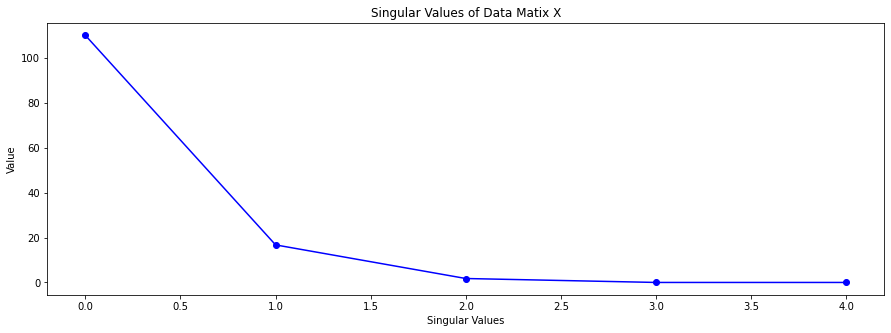

In [13]:
# plot the singlar values for the  D  matrix.
D=s*s
print(D)
plt.figure(figsize=(15,5))
plt.plot( D[:5],'bo-')
plt.title('Singular Values of Data Matix X')
plt.xlabel('Singular Values')
plt.ylabel('Value')
plt.show()
# 1. Calculate the D matrix using s: D is s*s
# 2. Set the fig size to (15,5)
# 3. Add the line chart using plt.plot( ?? ,'bo-')
# 3. Add proper tital, ticks, axis labels

# pca = PCA(n_components=5)
# pca.fit(X)

# print(pca.singular_values_)





In [14]:
# Obtaining our compressed data representation:
# 1. Determine at least k singular values are needed to represent the data set from the fig above


# 2. Obtain the first k of v^T and store it
# 3. Calculate the compressed data using np.matmul(), X and stored first k of v^T
# 4. Print the compressed value of X

# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
k=2
v=np.transpose(vT)

new_compressed=np.matmul(X_,v[:,:k])
print(X_)
print(X_.shape)
print(new_compressed)
print(new_compressed.shape)

[[-0.85714286 -1.28571429 -0.85714286 -1.57142857 -1.57142857]
 [ 1.14285714  0.71428571  1.14285714 -1.57142857 -1.57142857]
 [ 2.14285714  1.71428571  2.14285714 -1.57142857 -1.57142857]
 [ 3.14285714  2.71428571  3.14285714 -1.57142857 -1.57142857]
 [-1.85714286 -0.28571429 -1.85714286  2.42857143  2.42857143]
 [-1.85714286 -2.28571429 -1.85714286  3.42857143  3.42857143]
 [-1.85714286 -1.28571429 -1.85714286  0.42857143  0.42857143]]
(7, 5)
[[ 0.14417203 -2.82787396]
 [ 2.7775391  -0.57977689]
 [ 4.09422264  0.54427165]
 [ 5.41090617  1.66832018]
 [-4.07253971  1.16872711]
 [-5.73177463  1.41792961]
 [-2.6225256  -1.3915977 ]]
(7, 2)


Let's visualize what just happened.

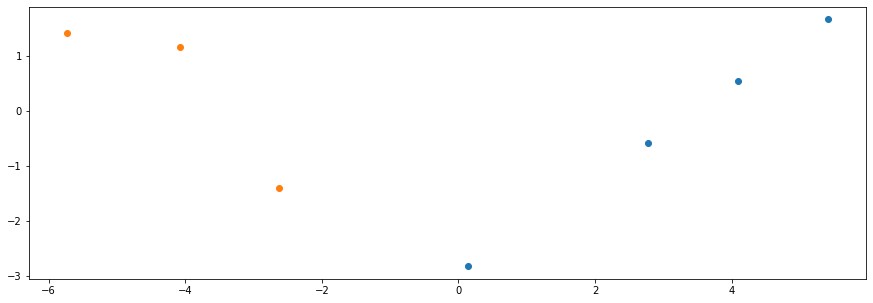

In [15]:
# Visualize what just happened:
# 1. Set the fig size to (15,5)
# 2. Create propor title, axis and legend
# 3. Plot the data
plt.figure(figsize=(15,5))
# plt.ylim(1, 5)
# plt.xlim(-4, 6)
plt.scatter(new_compressed[:4,0],new_compressed[:4,1])
plt.scatter(new_compressed[4:,0],new_compressed[4:,1])
plt.show()


## Solution2: Directly computing  V and D 

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [16]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.
# 2. Apply np.linalg.eig() to clculate the eigen vectors and values
XTX=np.matmul(X_.T,X_)
value,vector=np.linalg.eig(XTX)

In [17]:
print("V (Eigen-vectors) = ")
print(np.around(vector, decimals=3))
print("diagonal elements of D (Eigen-values) = ")
print(np.around(value, decimals=3)) 
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(value)), decimals=3))


V (Eigen-vectors) = 
[[-0.471 -0.356  0.389 -0.009  0.689]
 [-0.374 -0.412 -0.831 -0.     0.   ]
 [-0.471 -0.356  0.389  0.009 -0.689]
 [ 0.456 -0.537  0.061 -0.707 -0.16 ]
 [ 0.456 -0.537  0.061  0.707  0.16 ]]
diagonal elements of D (Eigen-values) = 
[110.093  16.726   1.753  -0.      0.   ]
sqrt(Eigen-values) = 
[10.492  4.09   1.324  0.     0.   ]


Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.


## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

In [18]:
# Import libs:
# 1. numpy
# 2. matplotlib and plt
# 3. pandas
# 4. fetch_lfw_people from sklearn.datasets

In [19]:
# Data set:
# 1. Load the dataset using fetch_lfw_people() with min_faces_per_person setted to be 70
#     detail of min_faces_per_person please refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
lfw_people = fetch_lfw_people(min_faces_per_person=70)
# 2. Store the number of images and its hight, width using lfw_people.images.shape
n_images, h, w = lfw_people.images.shape
# 3. Calculate number of pixels
data = lfw_people.data
print(data.shape)
n_pixels = data.shape[1]
print(n_pixels)
# 4. Store the pixel values using lfw_people.data


(639, 2914)
2914


In [20]:
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

1 face


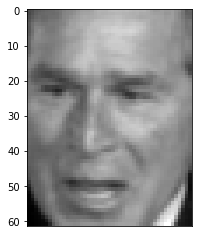

2 face


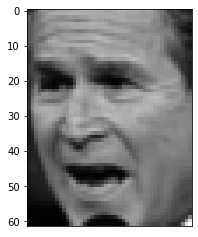

3 face


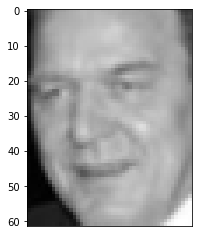

4 face


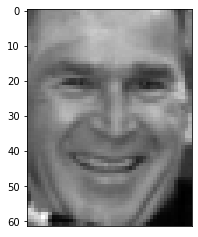

5 face


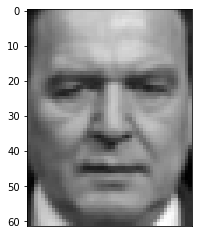

6 face


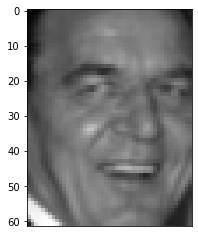

7 face


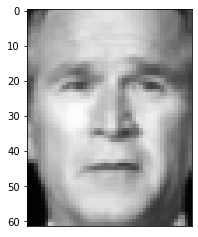

8 face


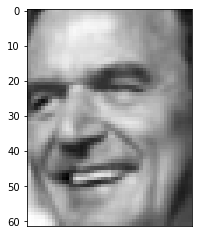

In [24]:

# Use the function we provided above, plot some faces:
# 1. Define the fig size to (10,20)
# plt.figure(figsize=(10,20))
for i in range(8):
    plt_face(data[:9][i])
    print(i+1, 'face')
    plt.show()
# 2. Use plt_face()
# 3. plt.show()

1 face


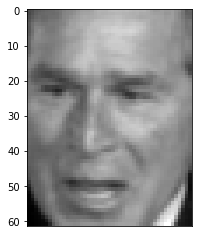

2 face


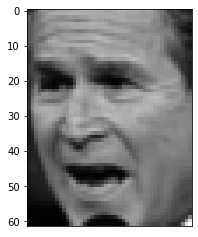

3 face


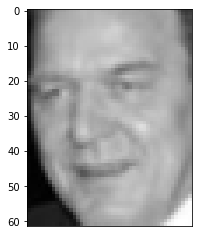

4 face


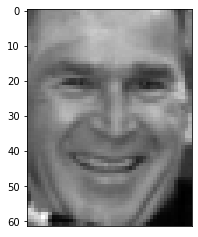

5 face


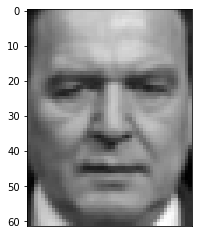

6 face


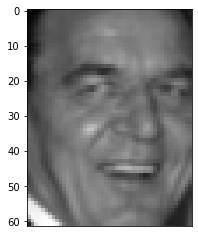

7 face


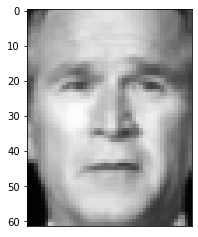

8 face


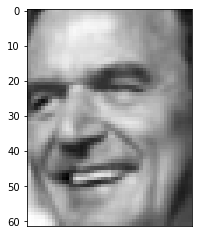


mean face


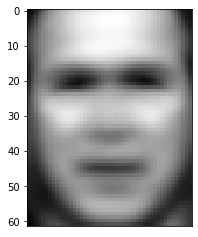

In [26]:
# Find the Mean picture:
# 1. Calculate the mean of the image data
# Xmean = np.mean(X)
# X_=X-Xmean
# plt.figure(figsize=(15,5))
Xmean = np.mean(data)
data_=data-Xmean

# mean_plot = Xmean.reshape(1,n_features)
# plt_face(mean_plot[i])
for i in range(8):
    plt_face(data_[:9][i])
    print(i+1, 'face')
    plt.show()
    
print()
mean_plot = np.mean(data,axis=0).reshape(1,n_pixels) #reshape mean face so I graph it
plt_face(mean_plot[:1])
print('mean face')

# 2. Remove the mean from all the image
# 3. plot the face use plt_face()

[ 1.1848831e+09  4.7814893e+08  4.3213786e+08 ... -2.1490017e-01
  8.8114485e-02 -2.1088164e-01]
(639, 2914)


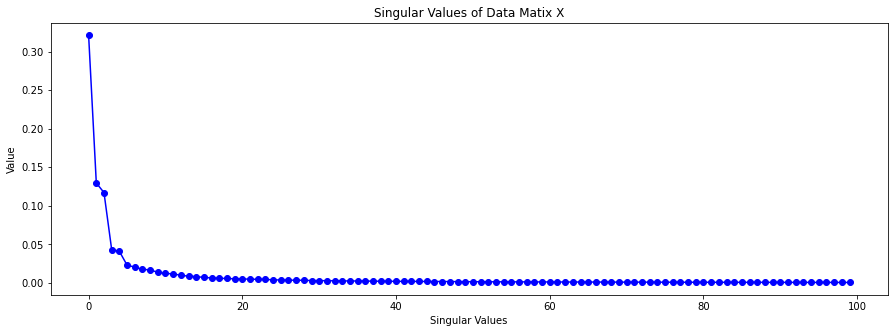

In [27]:
# Find eig vec and eig value:
# 1. Calculate the covariance metric of the zero_mean data
XTX_faces=np.matmul(data_.T,data_)
value_f,vector_f=np.linalg.eig(XTX_faces)
# 2. Use the np.linalg.eig() to compute eig value and eig vectors

# 3. Find the top5 features
print(value_f)
print(data.shape)

plt.figure(figsize=(15,5))
plt.plot( value_f[:100]/np.sum(value_f),'bo-')
plt.title('Singular Values of Data Matix X')  #plotting singular values again so I can find significant values
plt.xlabel('Singular Values')
plt.ylabel('Value')
plt.show()
#?
# 4. Calculate the new value based on the top5 feature.
# 5. Store the new value.

In [28]:
print("Top 5 Vector:",vector_f[:5])
print()
print()
print("Top 5 EigVal:",value_f[:5])
print()

print()

compressed=np.matmul(data_,vector_f[:,:5])
print("Associateed 5 attributes in fourth image",)
print()
print(compressed[3])

Top 5 Vector: [[ 3.58935222e-02 -1.84941292e-02  1.20920939e-02 ... -8.54555256e-05
   1.52612974e-05 -2.72904453e-03]
 [ 3.33109908e-02 -1.83232427e-02  1.15545355e-02 ... -7.71380635e-03
   8.49328283e-03  1.29711477e-03]
 [ 2.86361221e-02 -1.82917062e-02  1.13805067e-02 ... -1.37249501e-02
  -1.84777658e-02  7.15539511e-03]
 [ 2.11112220e-02 -1.81576815e-02  1.36331515e-02 ...  1.01225538e-04
  -7.14407023e-03 -2.06991588e-03]
 [ 1.27069028e-02 -1.73327588e-02  1.67650003e-02 ...  1.57719292e-02
  -2.50302143e-02 -1.51210930e-02]]


Top 5 EigVal: [1.1848831e+09 4.7814893e+08 4.3213786e+08 1.5921984e+08 1.5115648e+08]


Associateed 5 attributes in fourth image

[-1158.6774   1600.0015    654.39874  -232.65097   458.22003]


In [29]:
# prjection of fourth face to first 5 principle components

The proejction of fourth image
(639, 2914)


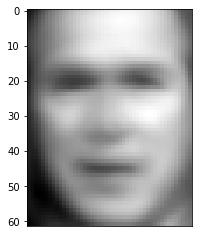

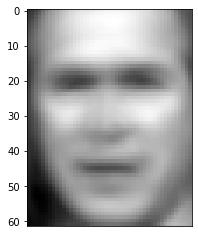

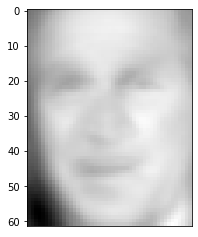

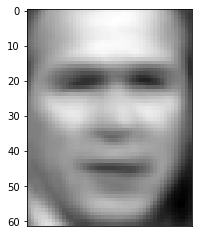

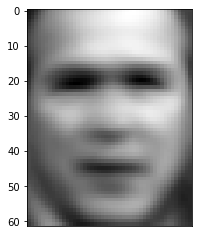

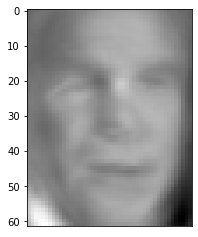

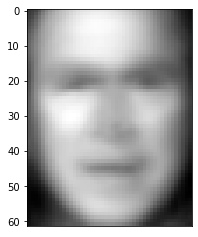

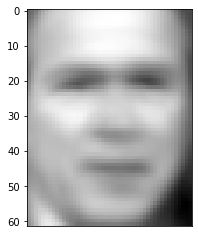

In [30]:
print("The proejction of fourth image")
# print(??)
m=np.matmul(compressed,np.transpose(vector_f[:,:5]))+Xmean
print(m.shape)
for i in range(8):
    plt_face(m[:9][i])
    plt.show()

In [31]:
# project back to the image space where d=5
# X’= X_pca * VT  + X_mean 


In [32]:
# project back to images where d=50
# 1. Find top 50 eig vec and eig val
# 2. Store the top 50 eig vec
# 3. Store the top 50 eig val
# 4. compute the newfeature using top50 eig vec and eig val.
# 5. plot the feace

print("Top 5 Vector:",vector_f[:50])
print()
print()
print("Top 5 EigVal:",value_f[:50])
print()
compressed50=np.matmul(data_,vector_f[:,:50])

print("Associateed 50 attributes in fourth image",)
print()
print(compressed50[3])

Top 5 Vector: [[ 3.58935222e-02 -1.84941292e-02  1.20920939e-02 ... -8.54555256e-05
   1.52612974e-05 -2.72904453e-03]
 [ 3.33109908e-02 -1.83232427e-02  1.15545355e-02 ... -7.71380635e-03
   8.49328283e-03  1.29711477e-03]
 [ 2.86361221e-02 -1.82917062e-02  1.13805067e-02 ... -1.37249501e-02
  -1.84777658e-02  7.15539511e-03]
 ...
 [ 3.48158590e-02 -1.80693194e-02  1.19674243e-02 ...  2.26551592e-02
  -6.32974226e-03  9.26390104e-03]
 [ 3.13958749e-02 -1.80138852e-02  1.14833014e-02 ...  3.97061696e-03
  -1.10488432e-02 -1.76550578e-02]
 [ 2.52617933e-02 -1.81609243e-02  1.19903870e-02 ... -1.50287617e-02
   1.75202917e-02 -1.11680645e-02]]


Top 5 EigVal: [1.1848831e+09 4.7814893e+08 4.3213786e+08 1.5921984e+08 1.5115648e+08
 8.4928040e+07 7.5482512e+07 6.5046316e+07 6.1834784e+07 5.0806432e+07
 4.5053528e+07 4.3100444e+07 3.6072136e+07 3.2251334e+07 2.9860106e+07
 2.6216130e+07 2.3606972e+07 2.1946562e+07 2.0958136e+07 1.9310094e+07
 1.8775356e+07 1.7764832e+07 1.7068212e+07 1.63802

(639, 2914)


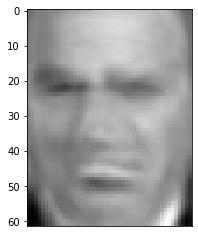

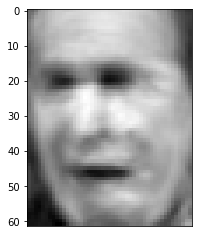

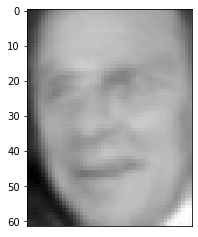

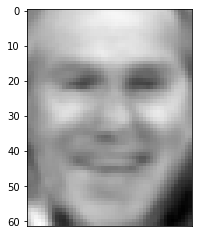

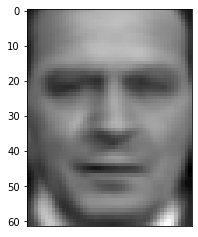

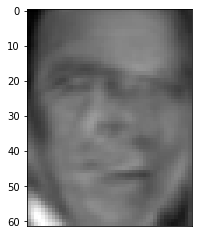

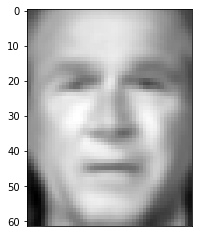

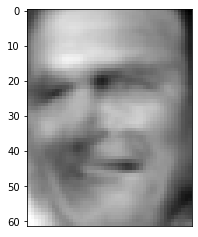

In [33]:
m50=np.matmul(compressed50,np.transpose(vector_f[:,:50]))+Xmean
print(m50.shape)
for i in range(8):
    plt_face(m50[:9][i])
    plt.show()


What number do you choose for K ? Explain your choice.

I chose the number 2 for k because based on my singular values and after graphing them, I found that the first two attributes were the most significant and they effectivey reduced the 2 categories, romance and scifi.

